In [10]:
from optimization import gradientDescent, testFunction
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [40]:
def display_descent(f, params, lr, iterations, alpha):
    x = params.copy()
    x_prev = params.copy()
    out = []
    for i in range(iterations):
        newParams = gradientDescent(f, x, x_prev, lr, alpha)
        x_prev = x.copy()
        x = newParams.copy()
        out.append(x)
    out = np.array(out)
    plt.plot(out[:, 0], out[:, 1], 'o-')
    plt.show()
    return out

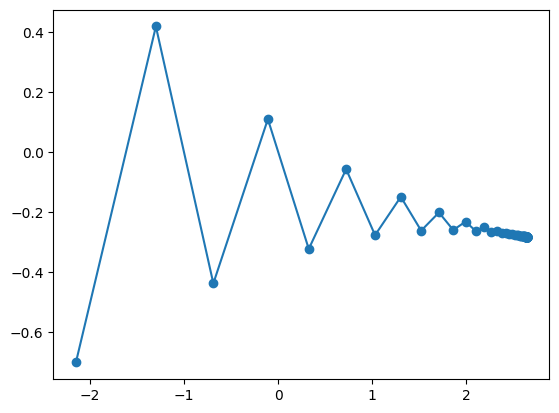

In [41]:
params = display_descent(testFunction, [-3, 1], 0.085, 100, 0)

In [59]:
# Src: https://en.wikipedia.org/w/index.php?title=Test_functions_for_optimization&oldid=787014841
def spherish(params):
    out = 0
    for i in range(len(params)):
        out += params[i] * params[i]
    return out

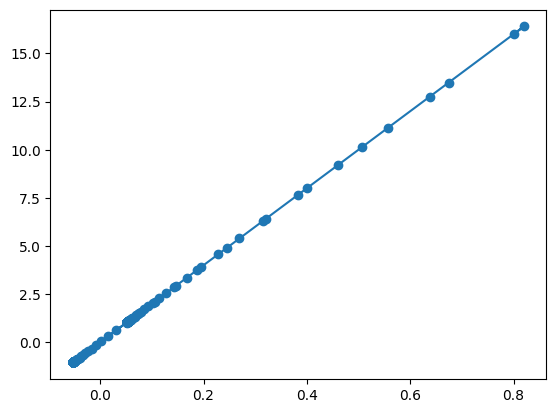

In [64]:
params = display_descent(spherish, [1, 20], 0.1, 1000, 0.9)

In [65]:
# Src: https://en.wikipedia.org/w/index.php?title=Test_functions_for_optimization&oldid=787014841
def rosenbrock(params):
    out = 0
    for i in range(len(params) - 1):
        out += 100 * (params[i + 1] - params[i] * params[i]) * (params[i + 1] - params[i] * params[i]) + (params[i] - 1) * (params[i] - 1)
    return out

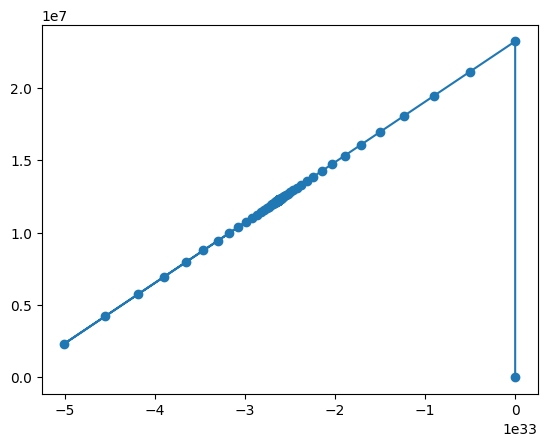

In [68]:
params = display_descent(rosenbrock, [3, 0], 0.1, 1000, 0.9)

# Attempt at Linear Regression

In [113]:
np.random.seed(42)
X = np.random.uniform(0, 100, 150)
y = 3 * X + np.random.normal(0, 10, 150)

batch_size = 20
start_index = 0
end_index = batch_size

loss = []

def forward(params, x):
    output = params[0] + params[1] * x
    return output

def mse(params):
    output = 0
    for i in range(start_index, end_index):
        output += (forward(params, X[i]) - y[i]) * (forward(params, X[i]) - y[i])
    loss.append(output / (end_index - start_index))
    return output / (end_index - start_index)

def display_descent(f, batch_size, X, iterations, initialParams, lr, alpha):
    params = initialParams
    params_prev = initialParams
    out = []
    for i in range(iterations * math.ceil(len(X) / batch_size)):  
        newParams = gradientDescent(f, params, params_prev, lr, alpha)
        params_prev = params.copy()
        params = newParams.copy()
        
        global start_index
        global end_index
        
        start_index += batch_size
        end_index += batch_size
        if end_index > len(X) and start_index < len(X):
            end_index = len(X) - 1
        elif end_index > len(X) and start_index > len(X):
            start_index = 0
            end_index = batch_size
        out.append(params)
    
    out = np.array(out)
    print(out)
    return out

params = display_descent(mse, batch_size, X, 10, [1, 1], 0.01, 0)

[[ 2.80509898e+00  1.19111144e+02]
 [-1.02885706e+02 -6.55993142e+03]
 [ 6.33049686e+03  4.45107153e+05]
 [-4.04234503e+05 -2.68426147e+07]
 [ 2.57730455e+07  1.61678875e+09]
 [-1.62573415e+09 -1.11624176e+11]
 [ 8.42736118e+10  7.40456859e+12]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4.32400083e+14]
 [ 8.42736118e+10 -4